In [1]:
import tensorflow as tf 
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus :
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next();

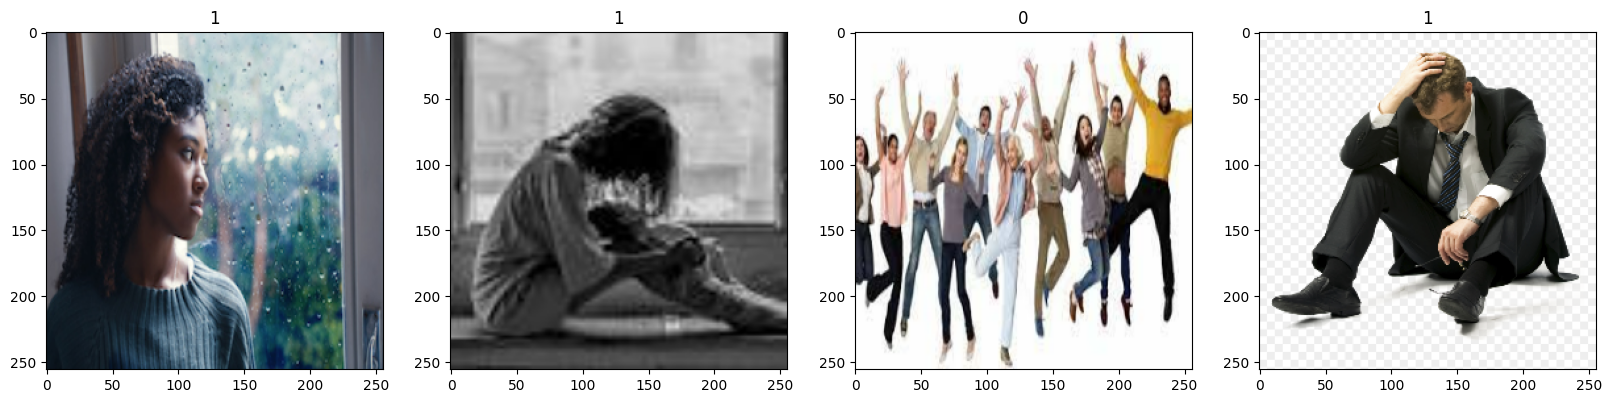

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[9.13725495e-01, 9.01960790e-01, 8.35294127e-01],
          [9.13725495e-01, 9.01960790e-01, 8.35294127e-01],
          [9.13725495e-01, 9.01960790e-01, 8.35294127e-01],
          ...,
          [9.01960790e-01, 8.90196085e-01, 8.31372559e-01],
          [9.01960790e-01, 8.90196085e-01, 8.31372559e-01],
          [9.01960790e-01, 8.90196085e-01, 8.31372559e-01]],
 
         [[9.13725495e-01, 9.01960790e-01, 8.35294127e-01],
          [9.13725495e-01, 9.01960790e-01, 8.35294127e-01],
          [9.13725495e-01, 9.01960790e-01, 8.35294127e-01],
          ...,
          [9.04159009e-01, 8.92394304e-01, 8.33570778e-01],
          [9.04159009e-01, 8.92394304e-01, 8.33570778e-01],
          [9.04159009e-01, 8.92394304e-01, 8.33570778e-01]],
 
         [[9.13725495e-01, 9.01960790e-01, 8.35294127e-01],
          [9.13725495e-01, 9.01960790e-01, 8.35294127e-01],
          [9.13725495e-01, 9.01960790e-01, 8.35294127e-01],
          ...,
          [9.05882359e-01, 8.94117653e-01, 8.3529

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train_size

7

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [15]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [24]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 [==============================] - 5s 493ms/step - loss: 0.6422 - accuracy: 0.5670 - val_loss: 0.6032 - val_accuracy: 0.6875
Epoch 2/20
7/7 [==============================] - 5s 512ms/step - loss: 0.5848 - accuracy: 0.7366 - val_loss: 0.5709 - val_accuracy: 0.6875
Epoch 3/20
7/7 [==============================] - 5s 486ms/step - loss: 0.5309 - accuracy: 0.7277 - val_loss: 0.5109 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 5s 478ms/step - loss: 0.4506 - accuracy: 0.8080 - val_loss: 0.4255 - val_accuracy: 0.7969
Epoch 5/20
7/7 [==============================] - 5s 498ms/step - loss: 0.4414 - accuracy: 0.8214 - val_loss: 0.3078 - val_accuracy: 0.9219
Epoch 6/20
7/7 [==============================] - 5s 482ms/step - loss: 0.3220 - accuracy: 0.8750 - val_loss: 0.3958 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 5s 497ms/step - loss: 0.2782 - accuracy: 0.9152 - val_loss: 0.2577 - val_accuracy: 0.8750
Epoch 8/20
7/7 [===============

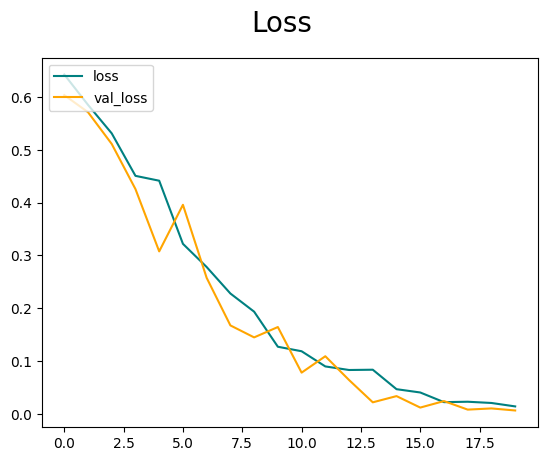

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

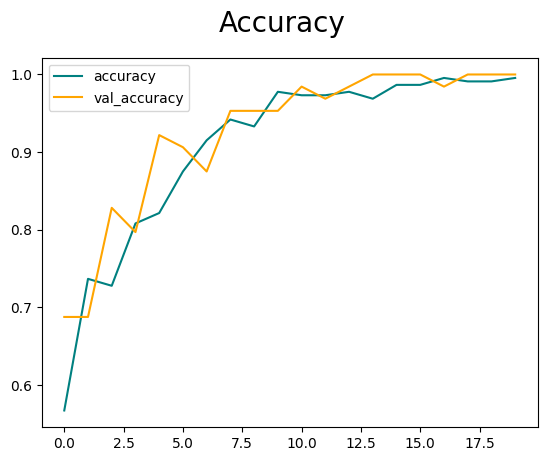

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 231ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [28]:
import cv2

In [ ]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()